# Compares startup tests for msre simulations

In [109]:
import matplotlib.pyplot as plt
import numpy as np
import pickle as pkl
import pandas as pd

FONTSIZE=15
DPI=600

In [110]:

# filenames with results in them
ch_8_file = 'channel_8_startup_beta_eff_results.pkl'
ch_1_file = 'channel_1_startup_beta_eff_results.pkl'
ch_1mod_file = 'channel_1mod_startup_beta_eff_results.pkl'
ch_2_file = 'channel_2_startup_beta_eff_results.pkl'
ch_1152_file = 'channel_1152_startup_beta_eff_results.pkl'

# open the files now.
with open(ch_1_file, 'rb') as handle:
  ch_1_data = pkl.load(handle)

with open(ch_1mod_file, 'rb') as handle:
  ch_1mod_data = pkl.load(handle)

with open(ch_8_file, 'rb') as handle:
  ch_8_data = pkl.load(handle)

with open(ch_2_file, 'rb') as handle:
  ch_2_data = pkl.load(handle)

with open(ch_1152_file, 'rb') as handle:
  ch_1152_data = pkl.load(handle)

Text(0.5, 0, 'Time (s)')

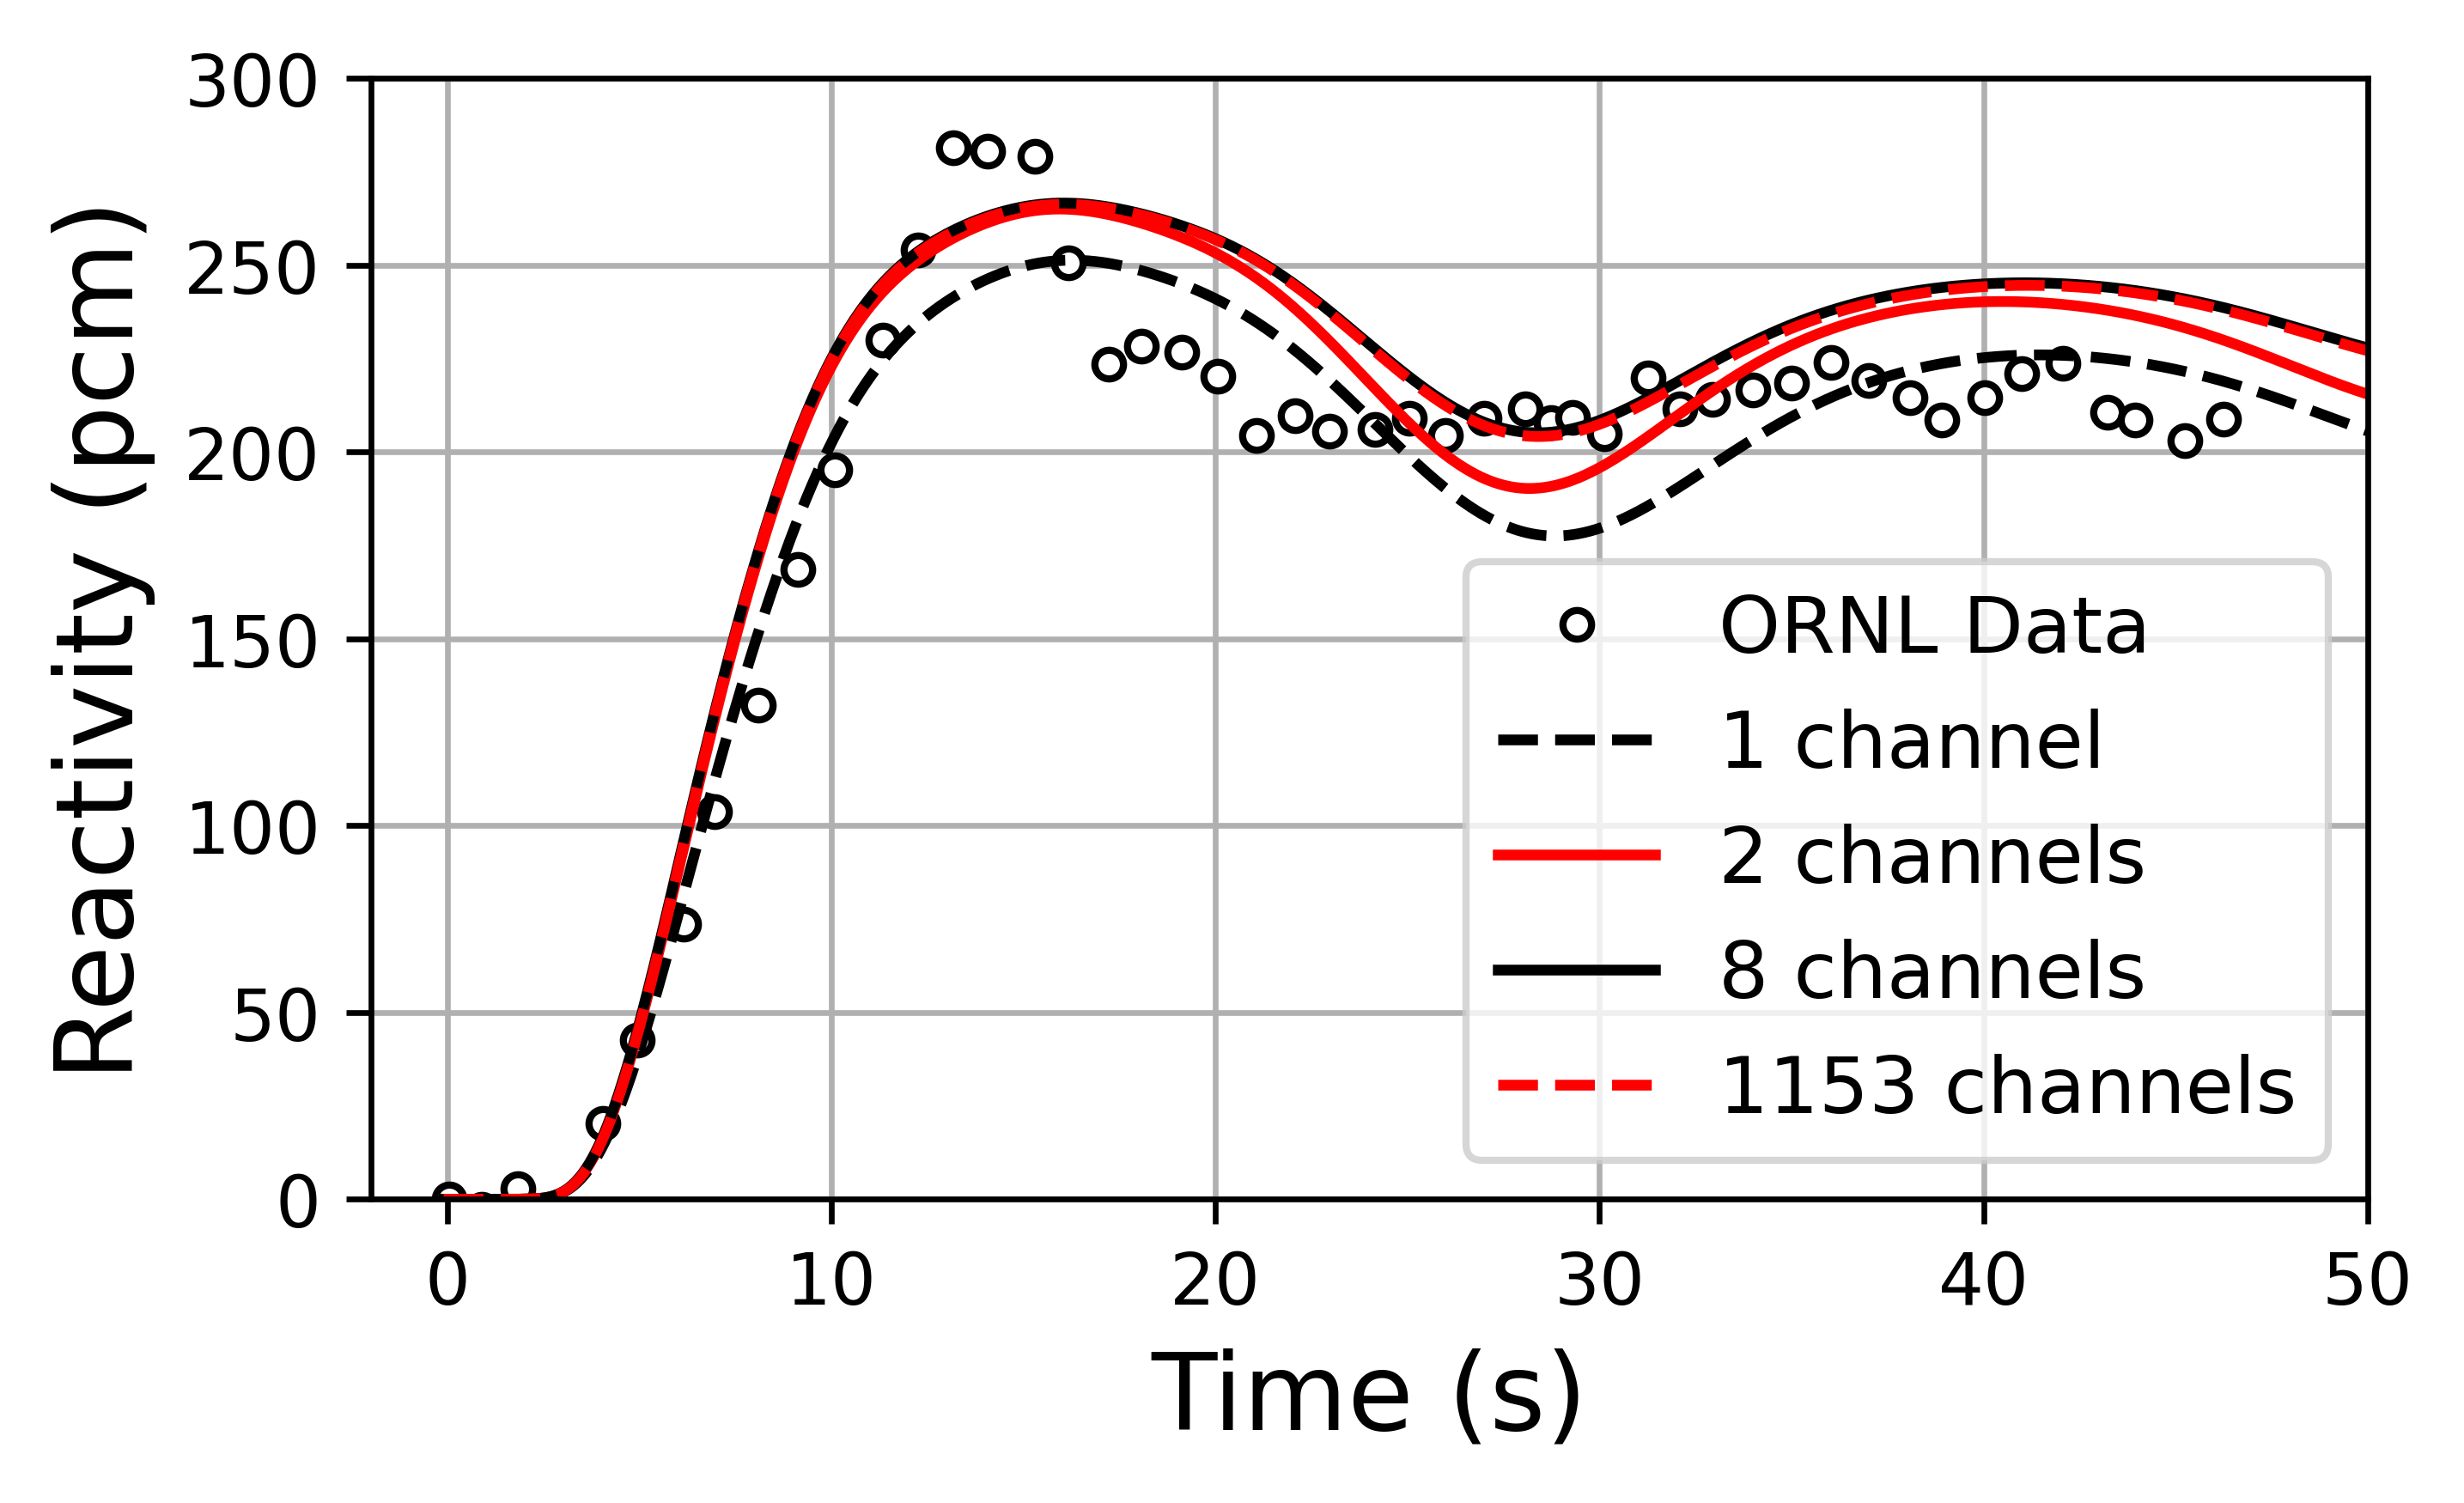

In [111]:
### EXP VALUES ###
msre_integral_worth = '../../Data/msre_integral_rod_worth.csv'
msre_data = '../../Data/msre_startup_datapoints.csv'

df = pd.read_csv(msre_integral_worth)
data = pd.read_csv(msre_data)

z = df['z'].values
rho = df[' rho'].values
pos = data['pos'].values
ornl_time_data = data['time'].values

values = np.interp(pos, z, rho)
base_insertion = values[0]
startup_base_insertion = values[0]

ornl_delta_rho_data = 1000*(values - base_insertion) # this is the data we calculated based on experimental values

# MAKE PLOT
plt.figure(figsize=(5,5/1.77), dpi=DPI)
plt.plot(ornl_time_data, ornl_delta_rho_data, 'ko', markerfacecolor='w', markersize=4, label='ORNL Data')

### MY VALUES ###

# channel 1 data
x = np.array(list(ch_1_data.keys()))
y_MC = ch_1_data[-0.1] - np.array(list(ch_1_data.values()))
plt.plot(x, y_MC*10**5, 'k--', label='1 channel')
# plt.plot(x[0::50], y[0::50]*10**5, 'ks', markerfacecolor='w')
# plt.plot(x[0::50], y[0::50]*10**5, 'k+', markerfacecolor='w')

# channel 1 data but modified (dont use this since it doesnt have most recent msre data in it)
# x = np.array(list(ch_1mod_data.keys()))
# y_MC = ch_1mod_data[-0.1] - np.array(list(ch_1mod_data.values()))
# plt.plot(x, y_MC*10**5, 'r--', label='1mod')

# channel 2 data
x = np.array(list(ch_2_data.keys()))
y_MC = ch_2_data[-0.1] - np.array(list(ch_2_data.values()))
plt.plot(x, y_MC*10**5, 'r-', label='2 channels')

# channel 8 data
x = np.array(list(ch_8_data.keys()))
y_MC = ch_1_data[-0.1] - np.array(list(ch_8_data.values()))
plt.plot(x, y_MC*10**5, 'k-', label='8 channels')

# channel 1152 data
x = np.array(list(ch_1152_data.keys()))
y_MC = ch_1152_data[-0.1] - np.array(list(ch_1152_data.values()))
plt.plot(x, y_MC*10**5, 'r--', label='1153 channels')

# OTHER PLOTTING STUFF
plt.grid()
plt.xlim([-2,50])
plt.ylim([0,300])
plt.legend(loc='lower right', fontsize=11, ncol=1)
plt.ylabel('Reactivity (pcm)', fontsize=FONTSIZE)
plt.xlabel('Time (s)', fontsize=FONTSIZE)

Text(0.5, 0, 'Time (s)')

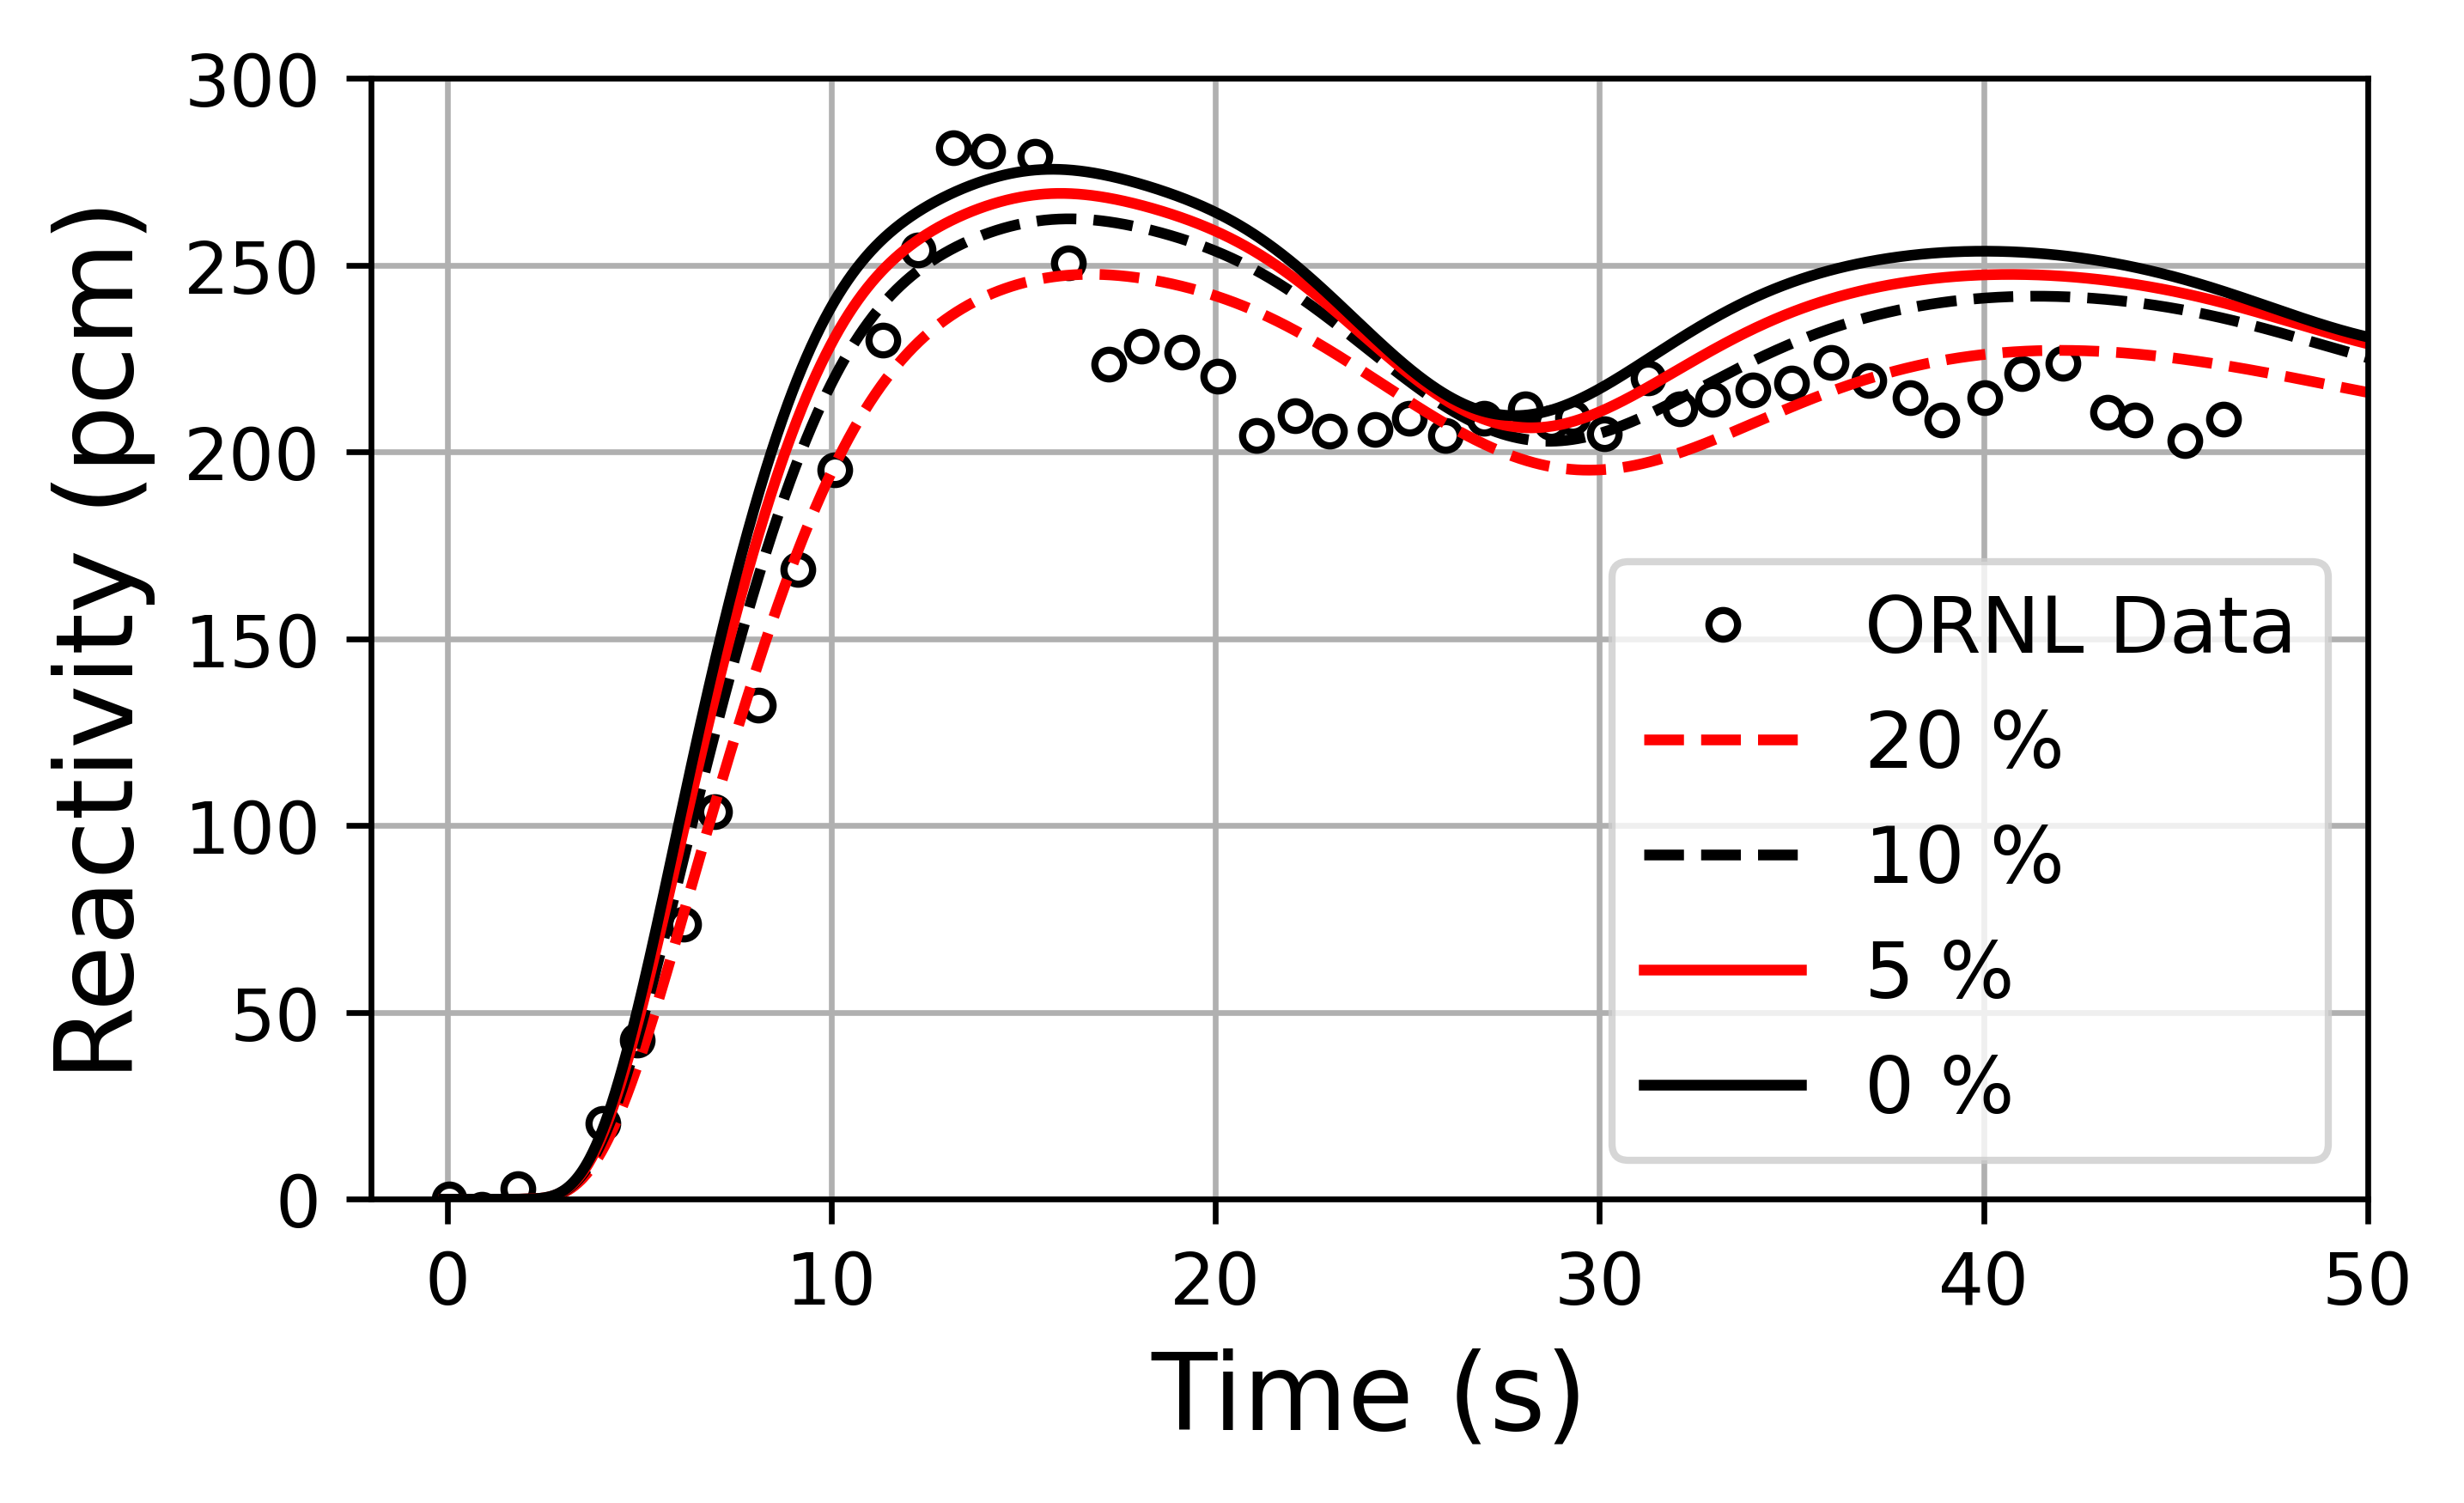

In [112]:
### VARIABLE BYPASS MASS FLOW RATES ###
file20 = "coastdown_bypass_modified_flowrate_20.0_percent.pkl"
file10 = "coastdown_bypass_modified_flowrate_10.0_percent.pkl"
file5 = "coastdown_bypass_modified_flowrate_5.0_percent.pkl"
file0 = "coastdown_bypass_modified_flowrate_1e-05_percent.pkl"

with open(file20, 'rb') as handle:
  bp_20_data = pkl.load(handle)
with open(file10, 'rb') as handle:
  bp_10_data = pkl.load(handle)
with open(file5, 'rb') as handle:
  bp_5_data = pkl.load(handle)
with open(file0, 'rb') as handle:
  bp_0_data = pkl.load(handle)

### EXP VALUES ###
msre_integral_worth = '../../Data/msre_integral_rod_worth.csv'
msre_data = '../../Data/msre_startup_datapoints.csv'

df = pd.read_csv(msre_integral_worth)
data = pd.read_csv(msre_data)

z = df['z'].values
rho = df[' rho'].values
pos = data['pos'].values
ornl_time_data = data['time'].values

values = np.interp(pos, z, rho)
base_insertion = values[0]
startup_base_insertion = values[0]

ornl_delta_rho_data = 1000*(values - base_insertion) # this is the data we calculated based on experimental values

# MAKE PLOT
plt.figure(figsize=(5,5/1.77), dpi=DPI)
plt.plot(ornl_time_data, ornl_delta_rho_data, 'ko', markerfacecolor='w', markersize=4, label='ORNL Data')

### MY VALUES ###

# 20% data
x = np.array(list(ch_1_data.keys()))
y_MC = bp_20_data[-0.1] - np.array(list(bp_20_data.values()))
plt.plot(x, y_MC*10**5, 'r--', label='20 %')

# 10% data
x = np.array(list(ch_1_data.keys()))
y_MC = bp_10_data[-0.1] - np.array(list(bp_10_data.values()))
plt.plot(x, y_MC*10**5, 'k--', label='10 %')

# 5% data
x = np.array(list(ch_1_data.keys()))
y_MC = bp_5_data[-0.1] - np.array(list(bp_5_data.values()))
plt.plot(x, y_MC*10**5, 'r-', label='5 %')

# 0% data
x = np.array(list(ch_1_data.keys()))
y_MC = bp_0_data[-0.1] - np.array(list(bp_0_data.values()))
plt.plot(x, y_MC*10**5, 'k-', label='0 %')

# OTHER PLOTTING STUFF
plt.grid()
plt.xlim([-2,50])
plt.ylim([0,300])
plt.legend(loc='lower right', fontsize=11, ncol=1)
plt.ylabel('Reactivity (pcm)', fontsize=FONTSIZE)
plt.xlabel('Time (s)', fontsize=FONTSIZE)